#잡케어 추천시스템 경진대회


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
sub_1=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/sample_submission.csv")
test=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/r_test.csv")
train=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/r_train.csv")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
tn_, val_=train_test_split(train, test_size=0.3, random_state=42)

In [7]:
val_['target'].value_counts()

1    75381
0    75205
Name: target, dtype: int64

In [8]:
tn_['target'].value_counts()

0    175901
1    175464
Name: target, dtype: int64

In [9]:
tn_bal=tn_.copy()
tn_bal=tn_bal.reset_index()
tn_bal.drop('index', axis=1, inplace=True)

**Target이 Balance한 최종 학습 후보 데이터 (tn_balance)**

([<matplotlib.patches.Wedge at 0x7fb2b184a110>,
 [Text(-1.082913295276276, 0.19312895928337034, 'target_0'),
  Text(1.082913295276276, -0.19312895928337026, 'target_1')],
 [Text(-0.590679979241605, 0.10534306870002018, '50.1%'),
  Text(0.590679979241605, -0.10534306870002012, '49.9%')])

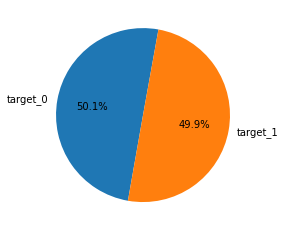

In [10]:
zero=len(tn_bal.loc[tn_bal['target']==0].index)
one=len(tn_bal.loc[tn_bal['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

**test의 target의 밸런스가 맞지 않을 것으로 예상되므로, 의도적으로 tn과 val 데이터의 target 비율을 7대 3정도로 맞춰주도록 합니다.**

- imbalanced test target issue: https://github.com/Proj-Caliber/Job-Care/blob/Yunyoseob/imbalanced_test_target_issue.ipynb

In [11]:
tn_, val_=train_test_split(train, test_size=0.3, random_state=42)

In [12]:
tn_=tn_.reset_index()
tn_.drop('index', axis=1, inplace=True)

In [13]:
val_=val_.reset_index()
val_.drop('index', axis=1, inplace=True)

In [14]:
tn_0=tn_.loc[tn_['target']==0]
tn_1=tn_.loc[tn_['target']==1]
val_0=val_.loc[val_['target']==0]
val_1=val_.loc[val_['target']==1]

In [15]:
tn_0_tn, tn_0_te=train_test_split(tn_0, test_size=0.3, random_state=42)

In [16]:
val_0_tn, val_0_te=train_test_split(val_0, test_size=0.3, random_state=42)

In [17]:
tn_0_te=tn_0_te.reset_index()
tn_1=tn_1.reset_index()
val_0_te=val_0_te.reset_index()
val_1=val_1.reset_index()
tn=pd.concat([tn_1, tn_0_te], axis=0)
val=pd.concat([val_1, val_0_te], axis=0)
tn=tn.sort_values('index', ascending=True)
val=val.sort_values('index', ascending=True)
tn.drop('index', axis=1, inplace=True)
val.drop('index', axis=1, inplace=True)

**Target이 ImBalance한 최종 학습 후보 데이터 (tn)**

([<matplotlib.patches.Wedge at 0x7fb2b1398290>,
 [Text(-0.8622824012186817, -0.6829854028810167, 'target_0'),
  Text(0.8622823692458266, 0.6829854432473683, 'target_1')],
 [Text(-0.47033585521018995, -0.3725374924805545, '23.1%'),
  Text(0.4703358377704508, 0.37253751449856454, '76.9%')])

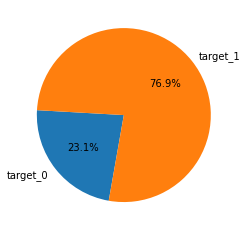

In [18]:
zero=len(tn.loc[tn['target']==0].index)
one=len(tn.loc[tn['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

In [19]:
tn['target'].value_counts()

1    175464
0     52771
Name: target, dtype: int64

**최종 검증에 사용할 Test 데이터 (검증 데이터는 무조건 불균형하게)**

([<matplotlib.patches.Wedge at 0x7fb2b135ef10>,
 [Text(-0.8604448185165998, -0.6852989962694648, 'target_0'),
  Text(0.8604447864354375, 0.6852990365497929, 'target_1')],
 [Text(-0.46933353737269073, -0.3737994525106171, '23.0%'),
  Text(0.46933351987387495, 0.3737994744817052, '77.0%')])

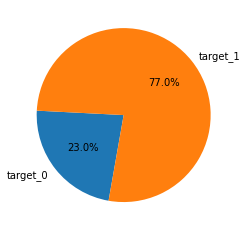

In [20]:
zero=len(val.loc[val['target']==0].index)
one=len(val.loc[val['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

In [21]:
val['target'].value_counts()

1    75381
0    22562
Name: target, dtype: int64

**실험에 사용할 Train data(balanced)**

In [22]:
tn_bal_tn, tn_bal_te=train_test_split(tn_bal, test_size=0.3, random_state=42)

([<matplotlib.patches.Wedge at 0x7fb2b12b3d50>,
 [Text(-1.0834479599286295, 0.19010659674638108, 'target_0'),
  Text(1.0834479599286295, -0.19010659674638083, 'target_1')],
 [Text(-0.5909716145065251, 0.10369450731620786, '50.0%'),
  Text(0.5909716145065251, -0.10369450731620772, '50.0%')])

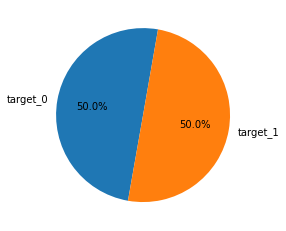

In [23]:
zero=len(tn_bal_tn.loc[tn_bal_tn['target']==0].index)
one=len(tn_bal_tn.loc[tn_bal_tn['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

**실험에 사용할 Train data(Imbalanced)**

In [24]:
tn_tn, tn_te=train_test_split(tn, test_size=0.3, random_state=42)

([<matplotlib.patches.Wedge at 0x7fb2b128ab90>,
 [Text(-0.8619387118348026, -0.6834190932660289, 'target_0'),
  Text(0.8619387438279583, 0.6834190529157651, 'target_1')],
 [Text(-0.4701483882735287, -0.37277405087237936, '23.1%'),
  Text(0.47014840572434086, 0.37277402886314454, '76.9%')])

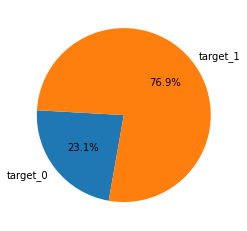

In [25]:
zero=len(tn_tn.loc[tn_tn['target']==0].index)
one=len(tn_tn.loc[tn_tn['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

**실험 검증에 사용할 Train data**

([<matplotlib.patches.Wedge at 0x7fb2b125d8d0>,
 [Text(-0.8630835582040033, -0.6819727058745951, 'target_0'),
  Text(0.8630835262785558, 0.6819727462784518, 'target_1')],
 [Text(-0.4707728499294562, -0.3719851122952337, '23.2%'),
  Text(0.47077283251557583, 0.371985134333701, '76.8%')])

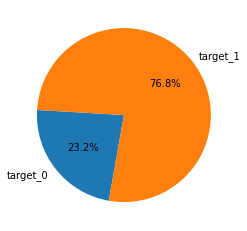

In [26]:
zero=len(tn_te.loc[tn_te['target']==0].index)
one=len(tn_te.loc[tn_te['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

**마지막에 학습시킬 Train 원본 데이터 불균형 데이터**

In [27]:
tn_0=train.loc[train['target']==0]
tn_1=train.loc[train['target']==1]
tn_0_tn, tn_00=train_test_split(tn_0, test_size=0.2, random_state=42)
tn_00=tn_00.reset_index()
tn_1=tn_1.reset_index()
tn_A=pd.concat([tn_1, tn_00], axis=0)
tn_A=tn_A.sort_values('index', ascending=True)
tn_A.drop('index', axis=1, inplace=True)

([<matplotlib.patches.Wedge at 0x7fb2b11b6a10>,
 [Text(-0.7074546667830692, -0.8423229157792496, 'target_0'),
  Text(0.7074546667830689, 0.8423229157792498, 'target_1')],
 [Text(-0.3858843636998559, -0.45944886315231787, '16.7%'),
  Text(0.38588436369985574, 0.45944886315231803, '83.3%')])

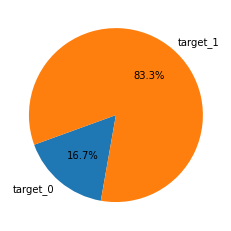

In [28]:
zero=len(tn_A.loc[tn_A['target']==0].index)
one=len(tn_A.loc[tn_A['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [30]:
mm=MinMaxScaler()
ss=StandardScaler()
rr=RobustScaler()

In [ ]:
def model_result(model, x_train,y_train, x_test, y_test, x,y,x_val,y_val):
  model.fit(x_train, y_train)
  pred=model.predict(x_test)
  df_pred_1=pd.DataFrame(pred, columns=['target'])
  df_pred_1['target']=df_pred_1['target'].apply(lambda x:1 if x>=0.5 else 0)
  f_1_1=f1_score(y_test,df_pred_1['target'])
  model.fit(x, y)
  pred_2=model.predict(x_val)
  df_pred_2=pd.DataFrame(pred_2, columns=['target'])
  df_pred_2['target']=df_pred_2['target'].apply(lambda x:1 if x>=0.5 else 0)
  f_1_2=f1_score(y_val, df_pred_2['target'])
  f_1_a=(f_1_1+f_1_2)/2
  return f_1_a

In [ ]:
def result(model, x_train,y_train, x_test, y_test, x,y,x_val,y_val):
  model.fit(x_train, y_train)
  y_pred_1=model.predict(x_test)
  df_y_pred_1=pd.DataFrame(y_pred_1, columns=['target'])
  df_y_pred_1['target']=df_y_pred_1['target'].apply(lambda x:1 if x>=0.5 else 0)
  f_1_1=f1_score(y_test,df_y_pred_1['target'])
  recall_1=recall_score(y_test, df_y_pred_1['target'])
  precision_1=precision_score(y_test, df_y_pred_1['target'])
  print("recall 1차 :", recall_1)
  print("precision 1차: ", precision_1)
  print("f1_1차 : ", f_1_1)
  auc_roc=classification_report(y_test, df_y_pred_1['target'])
  print(auc_roc)
  conf=confusion_matrix(y_test, df_y_pred_1['target'])
  sns.heatmap(conf/np.sum(conf), annot=True, cmap='Pastel1', fmt='.2%')
  plt.show()

  model.fit(x, y)
  y_pred_2=model.predict(x_val)
  df_y_pred_2=pd.DataFrame(y_pred_2, columns=['target'])
  df_y_pred_2['target']=df_y_pred_2['target'].apply(lambda x:1 if x>=0.5 else 0)
  f_1_2=f1_score(y_val, df_y_pred_2)
  recall_2=recall_score(y_val, df_y_pred_2)
  precision_2=precision_score(y_val, df_y_pred_2)
  print("recall 2차 :", recall_2)
  print("precision 2차: ", precision_2)
  print("f1_2차 : ", f_1_2 )
  auc_roc=classification_report(y_val, df_y_pred_2)
  print(auc_roc)
  conf=confusion_matrix(y_val, df_y_pred_2)
  sns.heatmap(conf/np.sum(conf), annot=True, cmap='Pastel1', fmt='.2%')
  plt.show()

  f_1_a=(f_1_1+f_1_2)/2
  print("f1 avg score :", f_1_a)

# 회귀로 끝까지 가보자

- 15개의 모델 사용
- Logistic Regression의 경우, 분류문제에 적합하나 회귀모형 후보로 일단 사용

In [ ]:
!pip install catboost

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import TweedieRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [ ]:
lrR=LinearRegression()
ridgeR=Ridge()
lassoR=Lasso()
brR=BayesianRidge()
trR=TweedieRegressor()
gbR=GradientBoostingRegressor(random_state=42)
rfR=RandomForestRegressor(random_state=42)
xgbR=XGBRegressor(random_state=42)
lgbmR=LGBMRegressor(random_state=42)
cbR=CatBoostRegressor(random_state=42)
extraR=ExtraTreesRegressor(random_state=42)
dtR=DecisionTreeRegressor(random_state=42)
logiR=LogisticRegression()
logiRCV=LogisticRegressionCV()
svm_clf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('liear_svc', LinearSVC(random_state=42))
])

p-value가 0.05이상인 칼럼 (다중공선성 방지)

```
'person_prefer_h_3_m', 'person_prefer_h_3', 'person_prefer_h_3_l',
       'contents_attribute_l', 'person_prefer_h_1', 'person_prefer_h_2_l',
       'date', 'contents_attribute_h_l', 'person_prefer_h_2_m',
       'person_prefer_h_2', 'hour', 'h_s_match_yn', 'person_prefer_d_3_l'
```


(Train & Train(target_0) & Train(target_1))과 Test가 서로 평균(p-value < 0.01)이 다른 칼럼 (Overfitting&Underfitting 방지)
```
'contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_l',
 'day',
 'h_l_match_yn',
 'person_attribute_a',
 'person_prefer_c'
 ```

Train에서 target이 0일 때와 1일때 유의미한 차이가 없는 칼럼(불필요한 칼럼)

```
day

date
```


In [ ]:
list_1=['person_prefer_h_3_m', 'person_prefer_h_3', 'person_prefer_h_3_l',
       'contents_attribute_l', 'person_prefer_h_1', 'person_prefer_h_2_l',
       'date', 'contents_attribute_h_l', 'person_prefer_h_2_m',
       'person_prefer_h_2', 'hour', 'h_s_match_yn', 'person_prefer_d_3_l']
list_2=['contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_l',
 'day',
 'h_l_match_yn',
 'person_attribute_a',
 'person_prefer_c']
list_3=['day','date']

print(len(set(list_1)|set(list_2)|set(list_3)))
set(list_1)|set(list_2)|set(list_3)

19


{'contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'}

실험 1: Train의 학습데이터는 균형한데, Train의 검증 데이터는 불균형할 경우
--

In [ ]:
# 1차 검증
x_train=tn_bal_tn.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y_train=tn_bal_tn['target']
x_test=tn_te.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y_test=tn_te['target']

# 2차 검증
x=tn.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y=tn['target']
x_val=val.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y_val=val['target']

In [ ]:
ss=StandardScaler()
s_x_train=ss.fit_transform(x_train)
s_x_test=ss.fit_transform(x_test)
s_x=ss.fit_transform(x)
s_x_val=ss.fit_transform(x_val)

df_x_train=pd.DataFrame(s_x_train , index=x_train.index , columns=x_train.columns )
df_x_test=pd.DataFrame(s_x_test , index=x_test.index , columns=x_test.columns )
df_x=pd.DataFrame(s_x , index=x.index , columns=x.columns )
df_x_val=pd.DataFrame(s_x_val , index=x_val.index , columns=x_val.columns )

In [ ]:
from tqdm import tqdm

In [ ]:
model_list=[lrR, ridgeR, lassoR, brR, trR, gbR, rfR, xgbR, lgbmR, cbR, extraR, dtR, logiR, logiRCV, svm_clf]
model_name=['lrR', 'ridgeR', 'lassoR', 
            'brR', 'trR', 'gbR', 'rfR', 'xgbR', 'lgbmR',
            'cbR', 'extraR', 'dtR', 'logiR', 'logiRCV', 'svm_clf']

df_model=pd.DataFrame(columns=['name','f1_avg_score'])

k=0
for i in tqdm(model_list):
  name=model_name[k]
  result=model_result(i, df_x_train,y_train, df_x_test, y_test, df_x,y,df_x_val,y_val)
  df_model=df_model.append({'name':name, 'f1_avg_score':result}, ignore_index=True)
  k+=1

df_model=df_model.sort_values('f1_avg_score', ascending=False)
df_model=df_model.reset_index()
df_model.drop('index', axis=1, inplace=True)

In [ ]:
df_model

name  f1_avg_score
0    lassoR      0.869435
1    extraR      0.853221
2       rfR      0.831065
3       brR      0.791322
4    ridgeR      0.791299
5   svm_clf      0.791219
6       lrR      0.791152
7   logiRCV      0.790855
8       trR      0.790386
9     logiR      0.789073
10      dtR      0.786488
11      cbR      0.731094
12    lgbmR      0.722754
13     xgbR      0.697159
14      gbR      0.697041

recall 1차 : 0.7381685482951306
precision 1차:  0.9753145325330855
f1_1차 :  0.8403310434359279
              precision    recall  f1-score   support

           0       0.52      0.94      0.67     15857
           1       0.98      0.74      0.84     52614

    accuracy                           0.78     68471
   macro avg       0.75      0.84      0.75     68471
weighted avg       0.87      0.78      0.80     68471



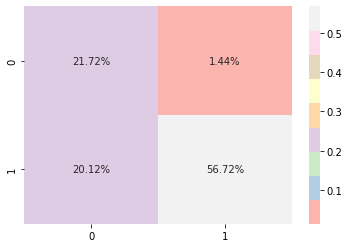

recall 2차 : 0.9333253737679256
precision 2차:  0.8079259539968535
f1_2차 :  0.8661102288535165
              precision    recall  f1-score   support

           0       0.54      0.26      0.35     22562
           1       0.81      0.93      0.87     75381

    accuracy                           0.78     97943
   macro avg       0.67      0.60      0.61     97943
weighted avg       0.75      0.78      0.75     97943



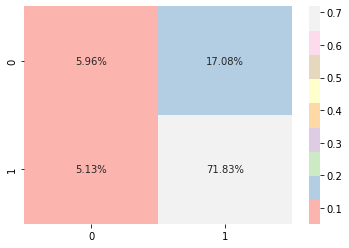

f1 avg score : 0.8532206361447222


In [ ]:
result(extraR, df_x_train,y_train, df_x_test, y_test, df_x,y,df_x_val,y_val)

# ExtraTree Regressor

실제로 제출해보기
--

In [31]:
x_A=tn_bal.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y_A=tn_bal['target']
t_A=test.drop(['contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)

In [32]:
ss=StandardScaler()
s_x_train=ss.fit_transform(x_A)
s_x_test=ss.fit_transform(t_A)

df_x_train=pd.DataFrame(s_x_train , index=x_A.index , columns=x_A.columns )
df_x_test=pd.DataFrame(s_x_test , index=t_A.index , columns=t_A.columns )

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
extraR=ExtraTreesRegressor(random_state=42)
extraR.fit(df_x_train, y_A)
pred=extraR.predict(df_x_test)

향후, 추가 분석을 위해, Test Data에 붙여서 따로 보관해두도록 합니다.

In [34]:
after_test=test.copy()
after_test['target']=pd.Series(pred)

In [36]:
#after_test.to_csv("after_test.csv", index=False)

**Test 사후검정**

In [37]:
df_pred=pd.DataFrame(pred, columns=['target'])

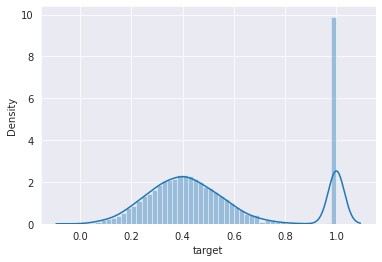

In [40]:
sns.distplot(df_pred['target'])
sns.set_style("darkgrid")

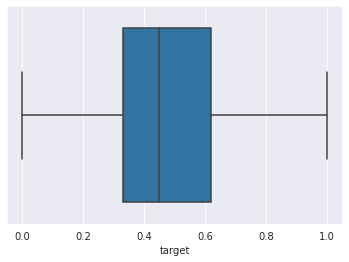

In [41]:
sns.boxplot(df_pred['target'])
sns.set_style("darkgrid")

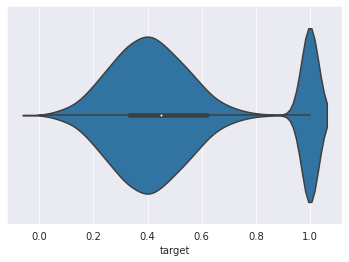

In [43]:
sns.violinplot(df_pred['target'])
sns.set_style("darkgrid")

기준점에 따른 스코어

|기준점|Score|
|---|---|
|0.4|0.61601|
|0.3|0.66433|
|0.2|0.6736|

기준점에 따른 차이 확인하기
--

**0.6기준점일때**

([<matplotlib.patches.Wedge at 0x7fb2a56ac690>,
 [Text(-0.6807781602025339, 0.8640260971702494, 'target_0'),
  Text(0.6807781602025339, -0.8640260971702494, 'target_1')],
 [Text(-0.3713335419286548, 0.47128696209286325, '73.2%'),
  Text(0.3713335419286548, -0.47128696209286325, '26.8%')])

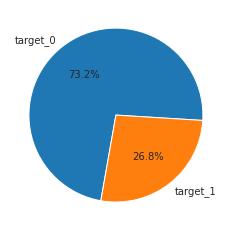

In [44]:
df_pred=pd.DataFrame(pred, columns=['target'])
df_pred['target']=df_pred['target'].apply(lambda x:1 if x>=0.6 else 0)
sub=sub_1.drop('target',axis=1)
sub_extraR=pd.concat([sub, df_pred], axis=1)
zero=len(sub_extraR.loc[sub_extraR['target']==0].index)
one=len(sub_extraR.loc[sub_extraR['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

In [45]:
sub_extraR['target'].value_counts()

0    33969
1    12435
Name: target, dtype: int64

**0.5 기준점일때**

In [46]:
df_pred=pd.DataFrame(pred, columns=['target'])
df_pred['target']=df_pred['target'].apply(lambda x:1 if x>=0.5 else 0)

In [47]:
sub=sub_1.drop('target',axis=1)
sub_extraR=pd.concat([sub, df_pred], axis=1)

([<matplotlib.patches.Wedge at 0x7fb2a57a70d0>,
 [Text(-0.9774768653491177, 0.5045185603198985, 'target_0'),
  Text(0.9774768181126767, -0.5045186518378854, 'target_1')],
 [Text(-0.5331691992813369, 0.2751919419926719, '59.6%'),
  Text(0.5331691735160055, -0.2751919919115738, '40.4%')])

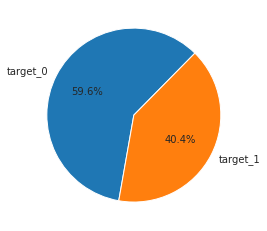

In [48]:
zero=len(sub_extraR.loc[sub_extraR['target']==0].index)
one=len(sub_extraR.loc[sub_extraR['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

In [49]:
sub_extraR['target'].value_counts()

0    27662
1    18742
Name: target, dtype: int64

**0.4기준점일 때**

- 2번째 제출 score: 0.61601

In [50]:
df_pred=pd.DataFrame(pred, columns=['target'])
df_pred['target']=df_pred['target'].apply(lambda x:1 if x>=0.4 else 0)
sub=sub_1.drop('target',axis=1)
sub_extraR=pd.concat([sub, df_pred], axis=1)

([<matplotlib.patches.Wedge at 0x7fb2a5550710>,
 [Text(-1.0810322062695354, -0.20339461400937014, 'target_0'),
  Text(1.0810322253127087, 0.2033945127958296, 'target_1')],
 [Text(-0.5896539306924738, -0.1109425167323837, '38.5%'),
  Text(0.5896539410796593, 0.11094246152499795, '61.5%')])

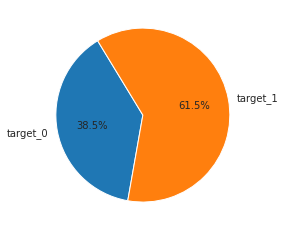

In [51]:
zero=len(sub_extraR.loc[sub_extraR['target']==0].index)
one=len(sub_extraR.loc[sub_extraR['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

In [52]:
sub_extraR['target'].value_counts()

1    28527
0    17877
Name: target, dtype: int64

In [53]:
#sub_extraR.to_csv("sub_extraR_4.csv", index=False)

**0.3기준점일때**

- 0.3 기준점으로 제출 score: 0.6643319228

In [54]:
df_pred=pd.DataFrame(pred, columns=['target'])
df_pred['target']=df_pred['target'].apply(lambda x:1 if x>=0.3 else 0)
sub=sub_1.drop('target',axis=1)
sub_extraR=pd.concat([sub, df_pred], axis=1)

([<matplotlib.patches.Wedge at 0x7fb2a550f510>,
 [Text(-0.7305148208886928, -0.8224038524119164, 'target_0'),
  Text(0.7305148208886928, 0.8224038524119164, 'target_1')],
 [Text(-0.39846262957565054, -0.4485839194974089, '17.6%'),
  Text(0.39846262957565054, 0.4485839194974089, '82.4%')])

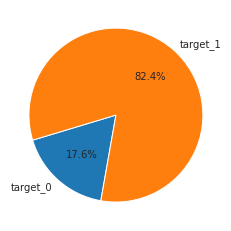

In [55]:
zero=len(sub_extraR.loc[sub_extraR['target']==0].index)
one=len(sub_extraR.loc[sub_extraR['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

In [56]:
sub_extraR['target'].value_counts()

1    38254
0     8150
Name: target, dtype: int64

In [57]:
#sub_extraR.to_csv("sub_extraR.csv", index=False)

**0.25일 때**

In [69]:
df_pred=pd.DataFrame(pred, columns=['target'])
df_pred['target']=df_pred['target'].apply(lambda x:1 if x>=0.25 else 0)
sub=sub_1.drop('target',axis=1)
sub_extraR=pd.concat([sub, df_pred], axis=1)

([<matplotlib.patches.Wedge at 0x7fb2a095ec90>,
 [Text(-0.5207270836560106, -0.9689392676257406, 'target_0'),
  Text(0.5207271063356709, 0.9689392554372432, 'target_1')],
 [Text(-0.2840329547214603, -0.5285123277958584, '10.1%'),
  Text(0.28403296709218406, 0.5285123211475872, '89.9%')])

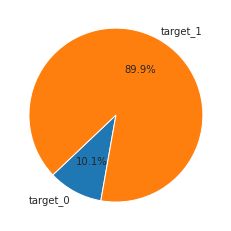

In [70]:
zero=len(sub_extraR.loc[sub_extraR['target']==0].index)
one=len(sub_extraR.loc[sub_extraR['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

**0.2일때**

- 0.2 기준점으로 제출 score:0.6736

In [60]:
df_pred=pd.DataFrame(pred, columns=['target'])
df_pred['target']=df_pred['target'].apply(lambda x:1 if x>=0.2 else 0)
sub=sub_1.drop('target',axis=1)
sub_extraR=pd.concat([sub, df_pred], axis=1)

([<matplotlib.patches.Wedge at 0x7fb2a55cc7d0>,
 [Text(-0.3563500224072314, -1.040679903491158, 'target_0'),
  Text(0.35634998586892447, 1.0406799160026188, 'target_1')],
 [Text(-0.19437273949485348, -0.5676435837224497, '4.9%'),
  Text(0.19437271956486787, 0.5676435905468828, '95.1%')])

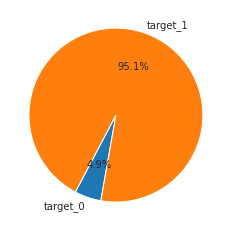

In [61]:
zero=len(sub_extraR.loc[sub_extraR['target']==0].index)
one=len(sub_extraR.loc[sub_extraR['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

In [62]:
sub_extraR['target'].value_counts()

1    44109
0     2295
Name: target, dtype: int64

In [63]:
#sub_extraR.to_csv("sub_extraR_2.csv", index=False)

# Test 사후분석

In [64]:
after_test=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/after_test.csv")

In [67]:
after_test.loc[(after_test['target']>0.2)&(after_test['target']<0.3)]
# 0.01를 좌우한 친구들

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  ...  date  hour  day  target
2          2             1             2             2  ...    10    23    4    0.29
5          5             2             2             2  ...    22     6    5    0.27
10        10             1             2             2  ...    26     6    2    0.24
12        12             2             2             2  ...    11    17    0    0.27
21        21             2             2             2  ...     8    14    5    0.22
...      ...           ...           ...           ...  ...   ...   ...  ...     ...
37133  37133             2             2             2  ...     8    12    5    0.27
37135  37135             1             2             2  ...    28    15    1    0.29
37144  37144             2             2             2  ...    15    22    5    0.28
37146  37146             2             2             2  ...     4     9    0    0.26
37148  37148             1             2             2  ...    25    16    0    0.28

[5483 rows x 59 columns]

In [68]:
after_test.loc[(after_test['target']>0.3)&(after_test['target']<0.4)]
# 0.05를 좌우한 친구들

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  ...  date  hour  day  target
1          1             2             2             2  ...    17     5    4    0.33
8          8             1             2             2  ...     9    17    6    0.36
11        11             1             2             2  ...    16    21    6    0.38
13        13             2             2             2  ...     2    12    6    0.35
14        14             2             2             2  ...     2    11    6    0.31
...      ...           ...           ...           ...  ...   ...   ...  ...     ...
37131  37131             2             2             2  ...    15    23    5    0.35
37132  37132             2             2             2  ...     3    14    4    0.31
37137  37137             2             2             2  ...    31     9    4    0.31
37138  37138             1             2             2  ...    30    19    6    0.31
37145  37145             1             2             2  ...     1    14    5    0.38

[8859 rows x 59 columns]

실험 2: Train의 학습데이터와 Train의 검증 데이터 둘 다 불균형할 경우
--

In [ ]:
# 1차 검증
x_train=tn_tn.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y_train=tn_tn['target']
x_test=tn_te.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y_test=tn_te['target']

# 2차 검증
x=tn.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y=tn['target']
x_val=val.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y_val=val['target']

In [ ]:
from tqdm import tqdm

**각 칼럼의 분포를 정규분포로 변환 후 modeling 진행**

In [ ]:
ss=StandardScaler()
s_x_train=ss.fit_transform(x_train)
s_x_test=ss.fit_transform(x_test)
s_x=ss.fit_transform(x)
s_x_val=ss.fit_transform(x_val)

df_x_train=pd.DataFrame(s_x_train , index=x_train.index , columns=x_train.columns )
df_x_test=pd.DataFrame(s_x_test , index=x_test.index , columns=x_test.columns )
df_x=pd.DataFrame(s_x , index=x.index , columns=x.columns )
df_x_val=pd.DataFrame(s_x_val , index=x_val.index , columns=x_val.columns )

In [ ]:
model_list=[lrR, ridgeR, lassoR, brR, trR, gbR, rfR, xgbR, lgbmR, cbR, extraR, dtR, logiR, logiRCV, svm_clf]
model_name=['lrR', 'ridgeR', 'lassoR', 
            'brR', 'trR', 'gbR', 'rfR', 'xgbR', 'lgbmR',
            'cbR', 'extraR', 'dtR', 'logiR', 'logiRCV', 'svm_clf']

df_model=pd.DataFrame(columns=['name','f1_avg_score'])

k=0
for i in tqdm(model_list):
  name=model_name[k]
  result=model_result(i, df_x_train,y_train, df_x_test, y_test, df_x,y,df_x_val,y_val)
  df_model=df_model.append({'name':name, 'f1_avg_score':result}, ignore_index=True)
  k+=1

df_model=df_model.sort_values('f1_avg_score', ascending=False)
df_model=df_model.reset_index()
df_model.drop('index', axis=1, inplace=True)

In [ ]:
df_model

name  f1_avg_score
0       cbR      0.875228
1     lgbmR      0.874718
2       gbR      0.873369
3      xgbR      0.873143
4    lassoR      0.869435
5       trR      0.869435
6       rfR      0.869217
7    ridgeR      0.868874
8       brR      0.868866
9       lrR      0.868826
10  svm_clf      0.868732
11  logiRCV      0.868713
12   extraR      0.864525
13    logiR      0.864395
14      dtR      0.812570

- f1_avg_score: 0.91이상 모델 lgbm, cb, xgb, gb

recall 1차 : 0.9908918765385344
precision 1차:  0.8460083422252401
f1_1차 :  0.9127363427056443
              precision    recall  f1-score   support

           0       0.64      0.08      0.15     10384
           1       0.85      0.99      0.91     52810

    accuracy                           0.84     63194
   macro avg       0.74      0.54      0.53     63194
weighted avg       0.81      0.84      0.79     63194



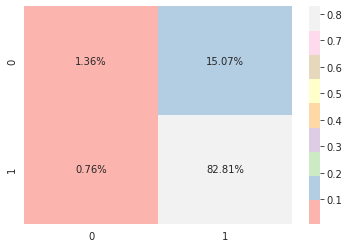

recall 2차 : 0.9911250845703825
precision 2차:  0.8446137671410968
f1_2차 :  0.9120228518414533
              precision    recall  f1-score   support

           0       0.66      0.09      0.15     15041
           1       0.84      0.99      0.91     75381

    accuracy                           0.84     90422
   macro avg       0.75      0.54      0.53     90422
weighted avg       0.81      0.84      0.79     90422



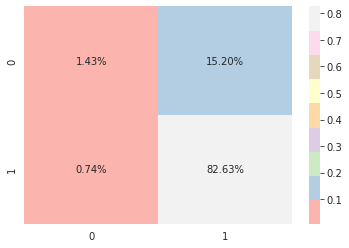

f1 avg score : 0.9123795972735488


In [ ]:
result(lgbmR, df_x_train,y_train, df_x_test, y_test, df_x,y,df_x_val,y_val)

# AutoML

In [ ]:
!pip install mljar-supervised

In [ ]:
from supervised.automl import AutoML

In [ ]:
automl=AutoML(total_time_limit=7200, mode="Compete", 
              algorithms=['LightGBM','Xgboost','CatBoost'], ml_task='regression',
              validation_strategy={"validation_type":"kfold", "k_folds":10, "shuffle":True,
                                   "stratify":True, "random_seed":1234},
              boost_on_errors=True, kmeans_features=True)

In [ ]:
automl.fit(df_x,y)

AutoML directory: AutoML_2
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['LightGBM', 'Xgboost', 'CatBoost']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 3 models
1_Default_LightGBM rmse 0.341095 trained in 155.66 seconds
2_Default_Xgboost rmse 0.341235 trained in 266.69 seconds
3_Default_CatBoost rmse 0.341193 trained in 351.77 seconds
* Step not_so_random will try to check up to 27 models
13_LightGBM rmse 0.341404 trained in 268.57 seconds
4_Xgboost rmse 0.34135 trained in 196.23 seconds
22_CatBoost rmse 0.341192 trained in 575.26 seconds
14_LightGBM rmse 0.341926 trained

AutoML(algorithms=['LightGBM', 'Xgboost', 'CatBoost'], boost_on_errors=True,
       kmeans_features=True, ml_task='regression', mode='Compete',
       total_time_limit=7200,
       validation_strategy={'k_folds': 10, 'random_seed': 1234, 'shuffle': True,
                            'stratify': True, 'validation_type': 'kfold'})

recall 2차 : 0.9995489579602287
precision 2차:  0.8355827132290153
f1_2차 :  0.9102407673629148
              precision    recall  f1-score   support

           0       0.86      0.01      0.03     15041
           1       0.84      1.00      0.91     75381

    accuracy                           0.84     90422
   macro avg       0.85      0.51      0.47     90422
weighted avg       0.84      0.84      0.76     90422



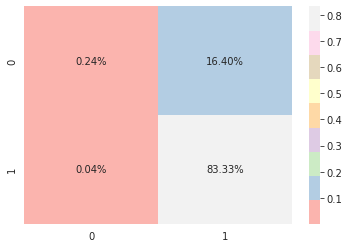

In [ ]:
y_pred_2=automl.predict(df_x_val)
df_y_pred_2=pd.DataFrame(y_pred_2, columns=['target'])
df_y_pred_2['target']=df_y_pred_2['target'].apply(lambda x:1 if x>=0.5 else 0)
f_1_2=f1_score(y_val, df_y_pred_2)
recall_2=recall_score(y_val, df_y_pred_2)
precision_2=precision_score(y_val, df_y_pred_2)
print("recall 2차 :", recall_2)
print("precision 2차: ", precision_2)
print("f1_2차 : ", f_1_2 )
auc_roc=classification_report(y_val, df_y_pred_2)
print(auc_roc)
conf=confusion_matrix(y_val, df_y_pred_2)
sns.heatmap(conf/np.sum(conf), annot=True, cmap='Pastel1', fmt='.2%')
plt.show()

Auto ML 실제 제출
--

id는 개인의 고유번호입니다. id에 대한 정보가 학습에 반영되면, test id와 train id가 서로 같지 않으므로, overfitting 문제가 발생할 수 있습니다. 따라서, id에 대한 정보도 제거해줍니다.

AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']

In [ ]:
x_A=tn_A.drop(['target','id','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y_A=tn_A['target']
t_A=test.drop(['id','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)

In [ ]:
ss=StandardScaler()
s_x_train=ss.fit_transform(x_A)
s_x_test=ss.fit_transform(t_A)
df_x_A=pd.DataFrame(s_x_train , index=x_A.index , columns=x_A.columns )
df_t_A=pd.DataFrame(s_x_test , index=t_A.index , columns=t_A.columns )

In [ ]:
automl=AutoML(total_time_limit=14400, mode="Compete", 
              algorithms=['LightGBM','Xgboost','CatBoost'], ml_task='regression',
              validation_strategy={"validation_type":"kfold", "k_folds":10, "shuffle":True,
                                   "stratify":True, "random_seed":1234},
              boost_on_errors=True, kmeans_features=True, golden_features=True, features_selection=True)
# 학습시간 제한: 4시간
# total_time_limit= 14400
#Please increase total_time_limit to at least (17243 seconds) to have features selection

In [ ]:
automl.fit(df_x_A,y_A)

AutoML directory: AutoML_3
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['LightGBM', 'Xgboost', 'CatBoost']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 3 models
1_Default_LightGBM rmse 0.361103 trained in 338.07 seconds
2_Default_Xgboost rmse 0.361132 trained in 422.32 seconds
3_Default_CatBoost rmse 0.361283 trained in 554.78 seconds
* Step not_so_random will try to check up to 27 models
13_LightGBM rmse 0.361162 trained in 626.9 seconds
4_Xgboost rmse 0.361285 trained in 312.88 seconds
22_CatBoost rmse 0.361097 trained in 1087.98 seconds
14_LightGBM rmse 0.361929 traine

AutoML(algorithms=['LightGBM', 'Xgboost', 'CatBoost'], boost_on_errors=True,
       features_selection=True, golden_features=True, kmeans_features=True,
       ml_task='regression', mode='Compete', total_time_limit=14400,
       validation_strategy={'k_folds': 10, 'random_seed': 1234, 'shuffle': True,
                            'stratify': True, 'validation_type': 'kfold'})

In [ ]:
y_pred=automl.predict(df_t_A)
df_pred=pd.DataFrame(y_pred, columns=['target'])
df_pred['target']=df_pred['target'].apply(lambda x:1 if x>=0.5 else 0)

([<matplotlib.patches.Wedge at 0x7f3c6bba8b90>,
 [Text(-0.21531144753667378, -1.0787219199402887, 'target_0'),
  Text(0.21531135127368262, 1.078721939154248, 'target_1')],
 [Text(-0.11744260774727658, -0.5883937745128847, '0.7%'),
  Text(0.11744255524019051, 0.5883937849932261, '99.3%')])

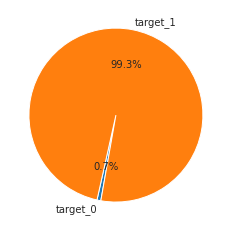

In [ ]:
zero=len(df_pred.loc[df_pred['target']==0].index)
one=len(df_pred.loc[df_pred['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

In [ ]:
df_pred['target'].value_counts()

1    46072
0      332
Name: target, dtype: int64

In [ ]:
sub_1.drop('target',axis=1, inplace=True)
sub_mljar=pd.concat([sub_1, df_pred], axis=1)

In [ ]:
sub_mljar.to_csv("sub_mljar_r.csv", index=False)

- score: 0.671306

In [ ]:
automl.report()

Test data target 비율 추론
--

Target 1이 99.3%, Target 0이 0.7%일 때, f1_score가 0.6713069042 가 나왔다.

사실상 소숫점 첫째 자리에서 Target 1의 경우, 올림 하고, Target 0의 경우, 내림을 한다면, Target 1은 100%, Target 0은 0%이다.

만약, 대회 평가지표가 Accuracy라면, test의 target 0은 약, 33.33%, target 1은 약, 66.67% 을 유추 할 수 있다.

그러나, f1_score가 평가지표이므로, f1_score로 accuracy를 계산해야, 정확한 target 0과 target 1의 비율을 유추해볼 수 있을 것이다.

$$Accuracy(정확도) = \frac{TP+TN}{TP+TN+FP+FN}$$

일 때, TP의 정확도의 경우 1에 근사 할 것이며, TN의 경우 0에 근사 할 것이다. 

따라서, $$Accuracy(정확도) = \frac{1+0}{1+0+FP+FN}$$

일 것으로, FP와 FN만 계산하면, 대략 정확한 test의 target 0과 target 1의 분포를 예측해볼 수 있다.

$$F1 Score = 2*\frac{Precision*Recall}{Precision+Recall} = 0.6713069042$$이다.

따라서, 1/2 F1 Score는 0.3356534521이다.

이는 곧, $Precision*Recall=0.3356534521$라는 것이고, $Precision+Recall=1$이라는 것이다.

Precision의 경우, $\frac{TP}{TP+FN}$이기 때문에, 이는 곧
$\frac{1}{1+FN}$이라는 말이며,

Recall의 경우, $\frac{TP}{TP+FP}$ 이고, 이는 곧,
$\frac{1}{1+FP}$이라는 말이다.

즉, $\frac{1}{1+FN} \times \frac{1}{1+FP} = 0.3356534521$이고, $\frac{1}{1+FN} + \frac{1}{1+FP} = 1$이라는 것이다.

이를 통해, FN과 FP를 구하면, Accuracy를 알 수 있고, test의 target 0과 target 1의 비율을 유추 해볼 수 있다.





In [ ]:
print("test 총 개수 :", 46072+332)

test 총 개수 : 46404


In [ ]:
print("1/2*F1 Score :", 0.6713069042/2)

1/2*F1 Score : 0.3356534521


In [ ]:
print("(1+FN)(1+FP) :", 1/0.335653421)

(1+FN)(1+FP) : 2.9792635421999765


In [ ]:
print("FN = 1/FP")

FN = 1/FP


In [ ]:
print("FP + 1/FP :", 2.9792635421999765-2)

FP + 1/FP : 0.9792635421999765


In [ ]:
print("FP^2 -0.9792635421999765FP +1 =0")

FP^2 -0.9792635421999765FP +1 =0


판별식으로 근의 개수를 확인하고,

$$ D=b^2 - 4ac$$

이를 이차방정식으로 해를 구하면 다음과 같다.

$$ x = \frac{-b \pm \sqrt{b^2 - 4ac} }{2a}$$

In [ ]:
import numpy as np
a=1
b=-0.9792635421999765
c=1

def dis_2(a,b,c):
  D=b**2-4*a*c
  if D>0:
    print("근의 개수는 2개")
  elif D==0:
    print("근의 개수는 중근")
  else:
    print("근이 없음")
    print(D)

# 판별식
# dis_2 >0이면 두 개의 근, dis_2=0이면 중근, dis_2<0이면 근이 없다. 

def fun_2(a,b,c):
  return((-b+np.sqrt(b**2-4*a*c))/2*a, (-b-np.sqrt(b**2-4*a*c))/2*a)

dis_2(a,b,c)

근이 없음
-3.0410429149179548


- 유추 실패

# 분류로 끝까지 가보자

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
ridgeCV=RidgeCV()
lassoCV=LassoCV()
bagging=BaggingClassifier(random_state=42)
kneigbors=KNeighborsClassifier()
rfC=RandomForestClassifier(random_state=42)
extra=ExtraTreesClassifier(random_state=42)
ada=AdaBoostClassifier(random_state=42)
gbC=GradientBoostingClassifier(random_state=42)
xgbC=XGBClassifier(random_state=42)
lgbmC=LGBMClassifier(random_state=42)
cbC=CatBoostClassifier(random_state=42)
gnb=GaussianNB()
dtC=DecisionTreeClassifier(random_state=42)

In [ ]:
model_list=[ridgeCV, lassoCV, bagging, kneigbors, rfC, extra, xgbC, lgbmC, cbC, gnb, dtC]
model_name=['ridgeCV', 'lassoCV', 'bagging', 'kneigbors', 'rfC', 'extra',
            'xgbC', 'lgbmC', 'cbC', 'gnb', 'dtC']

df_model=pd.DataFrame(columns=['name','f1_avg_score'])

k=0
for i in tqdm(model_list):
  name=model_name[k]
  result=model_result(i, x_train, y_train, x_test, y_test, x,y,x_val,y_val)
  df_model=df_model.append({'name':name, 'f1_avg_score':result}, ignore_index=True)
  k+=1

df_model=df_model.sort_values('f1_avg_score', ascending=False)
df_model=df_model.reset_index()
df_model.drop('index', axis=1, inplace=True)

In [ ]:
df_model

name  f1_avg_score
0       lgbmC      0.912263
1         cbC      0.912107
2        xgbC      0.911223
3     lassoCV      0.909885
4         rfC      0.909793
5     ridgeCV      0.909110
6       extra      0.908671
7     bagging      0.888566
8   kneigbors      0.887521
9         gnb      0.865413
10        dtC      0.857755

- f1_avg_score 0.91이상 lgbm, cb, xgb

recall 1차 : 0.9813671653096004
precision 1차:  0.845531373380755
f1_1차 :  0.9083993549744094
              precision    recall  f1-score   support

           0       0.48      0.09      0.15     10384
           1       0.85      0.98      0.91     52810

    accuracy                           0.83     63194
   macro avg       0.66      0.53      0.53     63194
weighted avg       0.79      0.83      0.78     63194



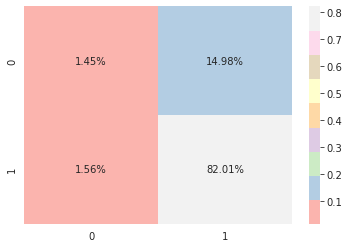

recall 2차 : 0.9830991894509227
precision 2차:  0.8451888094341989
f1_2차 :  0.9089426107860813
              precision    recall  f1-score   support

           0       0.54      0.10      0.16     15041
           1       0.85      0.98      0.91     75381

    accuracy                           0.84     90422
   macro avg       0.69      0.54      0.54     90422
weighted avg       0.79      0.84      0.79     90422



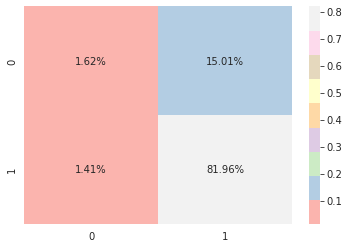

f1 avg score : 0.9086709828802453


In [ ]:
result(extra, x_train,y_train, x_test, y_test, x,y,x_val,y_val)

recall 1차 : 0.9910244271918197
precision 1차:  0.8459026992080169
f1_1차 :  0.9127310777816533
              precision    recall  f1-score   support

           0       0.64      0.08      0.15     10384
           1       0.85      0.99      0.91     52810

    accuracy                           0.84     63194
   macro avg       0.74      0.54      0.53     63194
weighted avg       0.81      0.84      0.79     63194



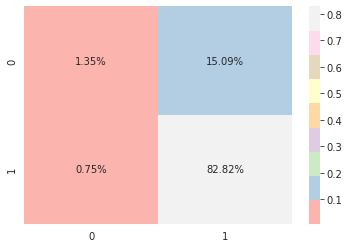

recall 2차 : 0.9904617874530717
precision 2차:  0.8447934464069519
f1_2차 :  0.9118466047874939
              precision    recall  f1-score   support

           0       0.65      0.09      0.15     15041
           1       0.84      0.99      0.91     75381

    accuracy                           0.84     90422
   macro avg       0.75      0.54      0.53     90422
weighted avg       0.81      0.84      0.79     90422



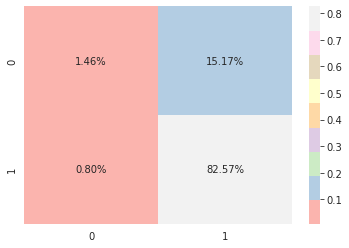

f1 avg score : 0.9122888412845735


In [ ]:
result(lgbmR, x_train,y_train, x_test, y_test, x,y,x_val,y_val)